Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Statistical Summary of Numeric Features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Number of Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


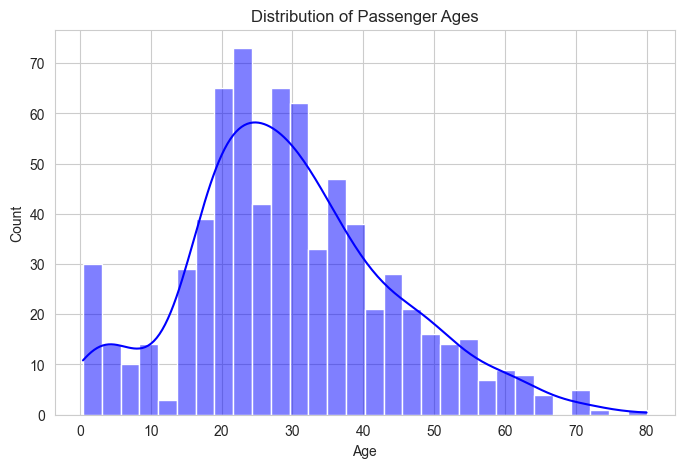

C:\Users\kulka\AppData\Local\Temp\ipykernel_9852\2119119487.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_by_class, x="Pclass", y="Survived", palette="viridis")


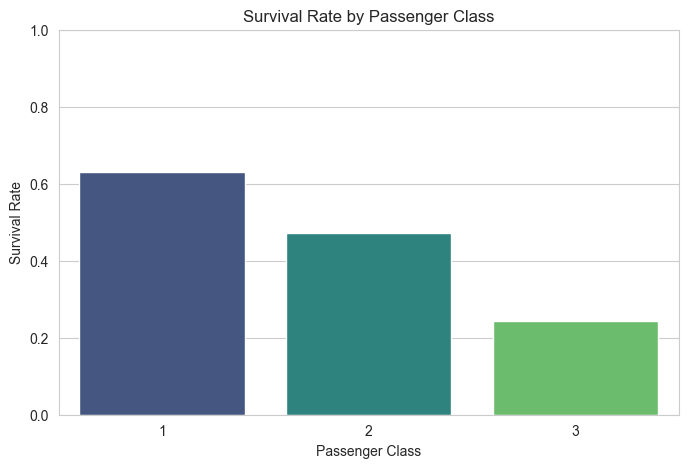

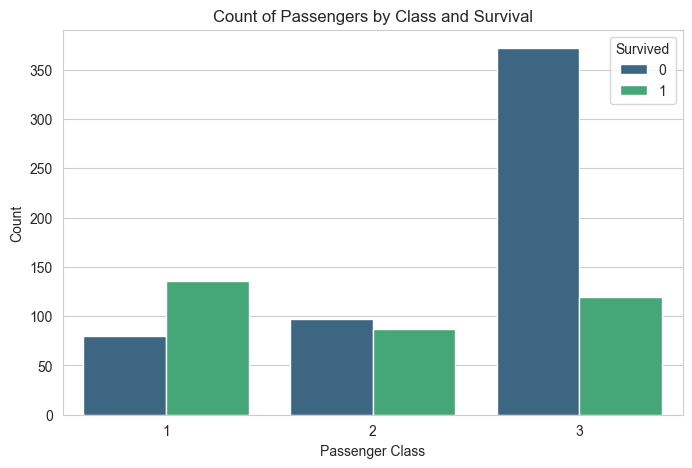

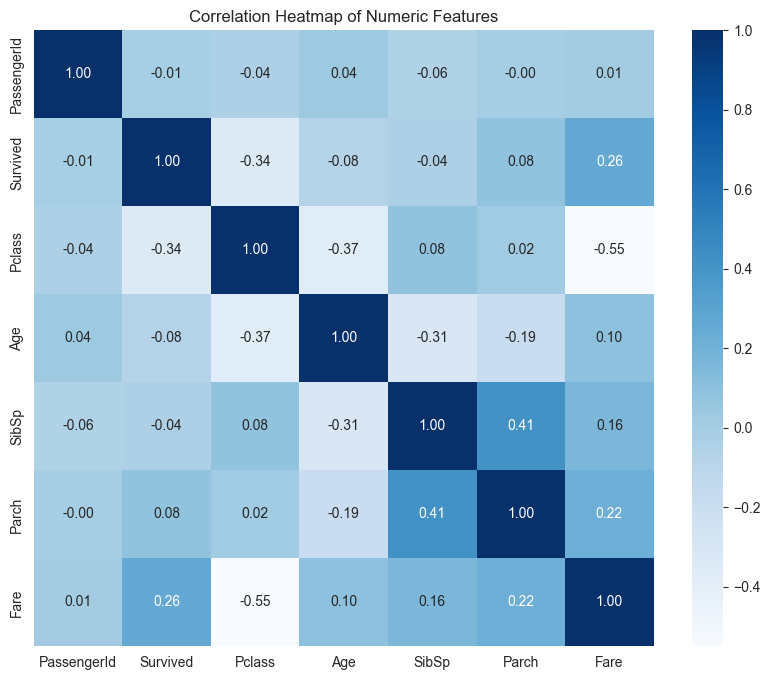

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("train.csv")

print("Dataset Information:")
df.info()

print("\nStatistical Summary of Numeric Features:")
display(df.describe())

print("\nNumber of Missing Values in Each Column:")
print(df.isnull().sum())


plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", bins=30, kde=True, color='blue')
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

survival_by_class = df.groupby("Pclass")["Survived"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=survival_by_class, x="Pclass", y="Survived", palette="viridis")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="viridis")
plt.title("Count of Passengers by Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [8]:


df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

print("Unique Titles in the Dataset:")
print(df['Title'].unique())

title_age_map = df.groupby('Title')['Age'].mean()

def impute_age(row):
    if pd.isnull(row['Age']):
        return title_age_map[row['Title']]
    else:
        return row['Age']

df['Age'] = df.apply(impute_age, axis=1)


df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

most_freq_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_freq_embarked, inplace=False)

df.drop(columns=['Cabin'], inplace=True)

print("\nMissing values after imputation:")
print(df[['Age', 'Fare', 'Embarked']].isnull().sum())


Unique Titles in the Dataset:
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']

Missing values after imputation:
Age         0
Fare        0
Embarked    2
dtype: int64


In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


def age_category(age):
    if age < 12:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeCategory'] = df['Age'].apply(age_category)

def family_size_category(size):
    if size == 1:
        return 'Single'
    elif 2 <= size <= 4:
        return 'Small Family'
    else:
        return 'Large Family'

df['FamilySizeCategory'] = df['FamilySize'].apply(family_size_category)

display(df[['SibSp', 'Parch', 'FamilySize', 'Age', 'AgeCategory', 'FamilySizeCategory']].head())


,SibSp,Parch,FamilySize,Age,AgeCategory,FamilySizeCategory
0,1,0,2,22.0,Adult,Small Family
1,1,0,2,38.0,Adult,Small Family
2,0,0,1,26.0,Adult,Single
3,1,0,2,35.0,Adult,Small Family
4,0,0,1,35.0,Adult,Single


In [10]:

categorical_features = ['Sex', 'Embarked', 'Pclass', 'FamilySizeCategory']

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

display(df_encoded.head())


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Title,FamilySize,AgeCategory,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,FamilySizeCategory_Single,FamilySizeCategory_Small Family
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,2,Adult,True,False,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,2,Adult,False,False,False,False,False,False,True
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,1,Adult,False,False,True,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,2,Adult,False,False,True,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,1,Adult,True,False,True,False,True,True,False


Test Set Accuracy: 0.7765


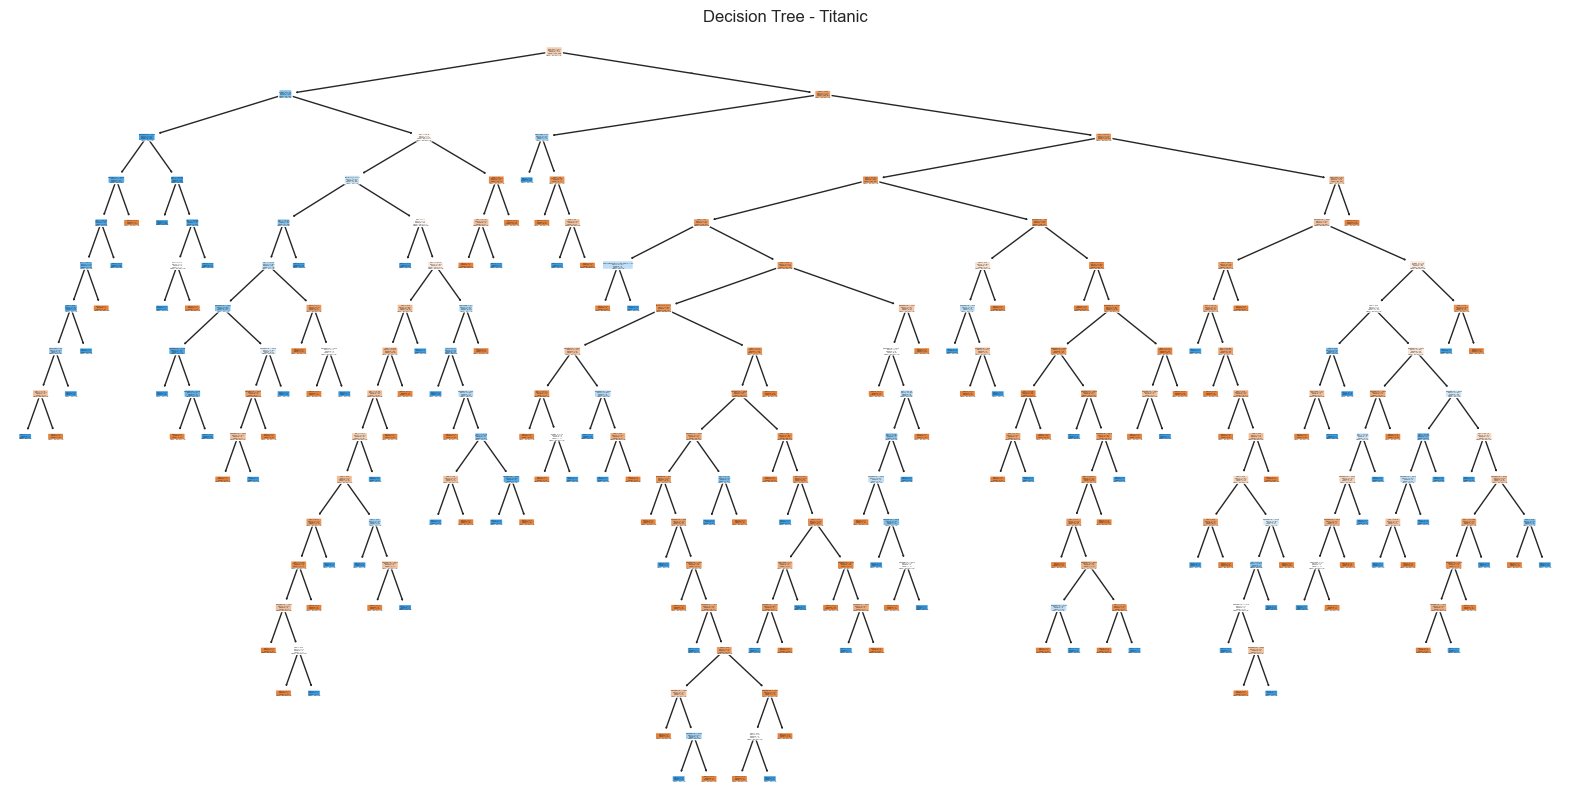

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

columns_to_drop = ['Name', 'Ticket', 'Title', 'AgeCategory']
X = df_encoded.drop(columns=columns_to_drop + ['Survived'], errors='ignore')
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree - Titanic")
plt.savefig("titanic_decision_tree.png")  
plt.show()
